## Image composition experments



In [1]:
from autogen import ConversableAgent
import os

In [2]:
import cv2
import pytesseract
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np

class ImageAnalysisAgent:
    def __init__(self, image_path):
        self.image = cv2.imread(image_path)
        self.rgb_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

    def object_identification(self):
        # Use a pre-trained model like YOLO or Faster R-CNN for object detection
        # For simplicity, let's assume we have a function detect_objects
        objects = detect_objects(self.rgb_image)
        return objects

    def color_identification(self, num_colors=5):
        pixels = self.rgb_image.reshape((-1, 3))
        kmeans = KMeans(n_clusters=num_colors)
        kmeans.fit(pixels)
        colors = kmeans.cluster_centers_
        return colors

    def position_extraction(self, objects):
        positions = []
        for obj in objects:
            x, y, w, h = obj['bbox']
            center_x, center_y = x + w // 2, y + h // 2
            positions.append((center_x, center_y))
        return positions

    def character_recognition(self):
        text = pytesseract.image_to_string(self.rgb_image)
        return text

def detect_objects(image):
    # Placeholder for object detection logic
    return [{"bbox": (50, 50, 100, 100), "label": "Logo"}]

# Example usage
agent = ImageAnalysisAgent('/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/Challenge_Data/Assets/2a355ca0d306921e195591e5b2374b6a/_preview.png')
objects = agent.object_identification()
colors = agent.color_identification()
positions = agent.position_extraction(objects)
text = agent.character_recognition()

print("Objects: ", objects)
print("Colors: ", colors)
print("Positions: ", positions)
print("Extracted Text: ", text)


/home/temesgen_gebreabzgi/Tenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Objects: [{'bbox': (50, 50, 100, 100), 'label': 'Logo'}]
Colors: [[218.18092283 113.02698577  75.32102231]
 [ 11.39495018   6.88686595   9.30965328]
 [251.77187974 249.1893474  245.93488473]
 [  1.29373487 145.55770783 160.93916465]
 [144.23347073  25.93336356  10.61686727]]
Positions: [(100, 100)]
Extracted Text:  

Tas i Tas
or SWIPE Ras

4 PROTEGE ed ue

 



In [ ]:
from PIL import Image
import glob, os

source_directory = '/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/adludio storyboard examples'
Assests_directory = '/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/Challenge_Data/Assets/0a22f881b77f00220f2034c21a18b854' 
destination_directory = '/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/images' 
os.makedirs(destination_directory, exist_ok=True)
size = (128, 128)
pattern = os.path.join(source_directory, '*.png')


for infile in glob.glob(pattern):
    file, ext = os.path.splitext(infile)
    with Image.open(infile) as im:
        #im.thumbnail(size)
        #im.save(file + ".thumbnail.png", "PNG")
        im.show()

        


In [ ]:
from PIL import Image

class StoryBoard:
    @staticmethod
    def combine_images_horizontally(images: list[Image.Image]) -> Image.Image:
        total_width = sum(image.width for image in images)
        max_height = max(image.height for image in images)
        combined_image = Image.new('RGBA', (total_width, max_height))

        current_x = 0
        for image in images:
            combined_image.paste(image, (current_x, 0))
            current_x += image.width

        return combined_image

    @staticmethod
    def combine_images_vertically(images: list[Image.Image]) -> Image.Image:
        total_height = sum(image.height for image in images)
        max_width = max(image.width for image in images)
        combined_image = Image.new('RGBA', (max_width, total_height))

        current_y = 0
        for image in images:
            combined_image.paste(image, (0, current_y))
            current_y += image.height

        return combined_image

    @staticmethod
    def create_storyboard(images: list[list[Image.Image]]) -> Image.Image:
        combined_rows = [StoryBoard.combine_images_horizontally(row) for row in images]
        storyboard = StoryBoard.combine_images_vertically(combined_rows)
        return storyboard

if __name__ == "__main__":

    # Define paths to images in the ./samples/ directory
    image1_path = "./samples/kfc-fs-320x480-sensoryvideo-storyboard.png"
    image2_path = "./samples/ITC-FS-320x480-SensorySwipe-Storyboard-Rev.png"
    image3_path = "./samples/Adludio-CocaCola-[BR]-[LIVE]-ifood-christmas2033-TapAndHold-FS-V3-sb.png"
    image4_path = "./samples/Adludio-Volvo-[UK]-[RFP]-Volvo_Vehicle_Electrification_XC40-Tap-FS-Version_2_AJ.png"
    image5_path = "./samples/Adludio-Microsoft-[FR]-[LIVE]-Windows_11_version_2-Swipe-MPU-v2.png"
    image6_path = "./samples/Disney-DrStrange-FS-600x900-UserSlider-Storyboard.png"

    image1 = Image.open(image1_path)
    image2 = Image.open(image2_path)
    image3 = Image.open(image3_path)
    image4 = Image.open(image4_path)
    image5 = Image.open(image5_path)
    image6 = Image.open(image6_path)


    images = [
        [image1, image2, image3],  # First row
        [image4, image5, image6]   # Second row
    ]
    storyboard = StoryBoard.create_storyboard(images)
    storyboard.show()


### #2

In [4]:
import os
from PIL import Image

# Helper function to dynamically rename product images
def dynamic_rename(images, category_name):
    count = 1
    for i in range(len(images)):
        filename, img, category = images[i]
        if category == category_name:
            images[i] = (f"{category_name.lower().replace(' ', '')}-{count}.png", img, category)
            count += 1

# Define the mapping function
def map_label_to_category(label: str) -> str:
    if 'logo' in label.lower():
        return "Logo"
    elif 'cta' in label.lower():
        return "CTA Button"
    elif 'icon' in label.lower():
        return "Icon"
    elif 'game' in label.lower():
        return "Product Image"
    elif 'text' in label.lower():
        return "Text Elements"
    elif 'bg' in label.lower() or 'background' in label.lower():
        return "Background"
    elif 'end' in label.lower() or 'endframe' in label.lower() or 'endcard' in label.lower():
        return "End Frame"
    elif 'instructions' in label.lower() or 'engagement' in label.lower():
        return "Text Elements"
    elif 'mpu' in label.lower() or 'preview' in label.lower():
        return "Interactive Elements"
    else:
        return "Unknown"


# Load the images and map labels
image_folder = "/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/Challenge_Data/Assets/c823124ca76c00a9d3b79380e5bdfd29"
images = []

for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        filepath = os.path.join(image_folder, filename)
        img = Image.open(filepath).convert("RGBA")
        
        # Convert JPEG files to PNG format
        if filename.lower().endswith(('.jpg', '.jpeg')):
            png_filepath = os.path.splitext(filepath)[0] + '.png'
            img.save(png_filepath, 'PNG')
            img = Image.open(png_filepath)  # Open the converted PNG file
            os.remove(filepath)  # Remove the original JPEG file
        
        label = map_label_to_category(filename)
        images.append((filename, img, label))






In [8]:
import os
from PIL import Image

# Map label to category function with dynamic renaming for product images
def map_label_to_category(label: str) -> str:
    if 'logo' in label.lower():
        return "Logo"
    elif 'cta' in label.lower():
        return "CTA Button"
    elif 'icon' in label.lower():
        return "Icon"
    elif 'game' in label.lower():
        return "Product Image"
    elif 'text' in label.lower():
        return "Text Elements"
    elif 'bg' in label.lower() or 'background' in label.lower():
        return "Background"
    elif 'end' in label.lower() or 'endframe' in label.lower() or 'endcard' in label.lower():
        return "End Frame"
    elif 'instructions' in label.lower() or 'engagement' in label.lower():
        return "Text Elements"
    elif 'mpu' in label.lower() or 'preview' in label.lower():
        return "Interactive Elements"
    else:
        return "Unknown"

image_folder = "/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/Challenge_Data/Assets/c823124ca76c00a9d3b79380e5bdfd29"
images = []
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        filepath = os.path.join(image_folder, filename)
        img = Image.open(filepath).convert("RGBA")
        label = map_label_to_category(filename)
        images.append((filename, img, label))

# Dynamically rename product images
product_image_count = 1
for i in range(len(images)):
    filename, img, category = images[i]
    if category == "Product Image":
        images[i] = (filename, img, f"Product Image {product_image_count}")
        product_image_count += 1





In [ ]:

# Function to resize and maintain aspect ratio
def resize_and_fit(image, target_size):
    image.thumbnail(target_size, Image.LANCZOS)
    return image

def create_ad_frame(background_image, elements, frame_size=(320, 480)):
    frame = Image.new("RGBA", frame_size, (255, 255, 255, 0))
    
    # Resize and paste the background image to fit the frame size
    bg = background_image.resize(frame_size, Image.LANCZOS)
    frame.paste(bg, (0, 0))
    
    for filename, img, category in elements:
        if category == "CTA Button":
            cta = resize_and_fit(img, (100, 50))
            frame.paste(cta, (110, 400), cta)
        elif category == "Text Elements":
            text = resize_and_fit(img, (280, 50))
            frame.paste(text, (20, 100), text)
        elif category == "Interactive Elements":
            interactive = resize_and_fit(img, (100, 100))
            frame.paste(interactive, (110, 250), interactive)
        elif category.startswith("Product Image"):
            product = resize_and_fit(img, (100, 100))
            frame.paste(product, (110, 150), product)
        elif category == "End Frame":
            end_frame = resize_and_fit(img, frame_size)
            frame.paste(end_frame, (0, 0), end_frame)
    return frame

# Find the background image
background_image = next(img for filename, img, category in images if category == "Background")

# Create ad frames with specific elements
ad_frame_1_elements = [
    ("cta-rev.png", next(img for filename, img, category in images if filename == "cta-rev.png"), "CTA Button"),
    ("f1-instructions-rev_v2-MPU.png", next(img for filename, img, category in images if filename == "f1-instructions-rev_v2-MPU.png"), "Text Elements"),
    ("mpu-click.png", next(img for filename, img, category in images if filename == "mpu-click.png"), "Interactive Elements")
]

ad_frame_2_elements = [
    ("game-1.png", next(img for filename, img, category in images if filename == "game-1.png"), "Product Image 1"),
    ("game-2.png", next(img for filename, img, category in images if filename == "game-2.png"), "Product Image 2"),
    ("game-3.png", next(img for filename, img, category in images if filename == "game-3.png"), "Product Image 3"),
    ("game-4.png", next(img for filename, img, category in images if filename == "game-4.png"), "Product Image 4")
]

ad_frame_3_elements = [
    ("_preview.png", next(img for filename, img, category in images if filename == "_preview.png"), "Interactive Elements")
]

ad_frame_4_elements = [
    ("endcard-rev.png", next(img for filename, img, category in images if filename == "endcard-rev.png"), "End Frame")
]

ad_frame_1 = create_ad_frame(background_image, ad_frame_1_elements)
ad_frame_2 = create_ad_frame(background_image, ad_frame_2_elements)
ad_frame_3 = create_ad_frame(background_image, ad_frame_3_elements)
ad_frame_4 = create_ad_frame(background_image, ad_frame_4_elements)

ad_frames = [ad_frame_1, ad_frame_2, ad_frame_3, ad_frame_4]

f1-instructions-rev_v2-MPU.png: Text Elements


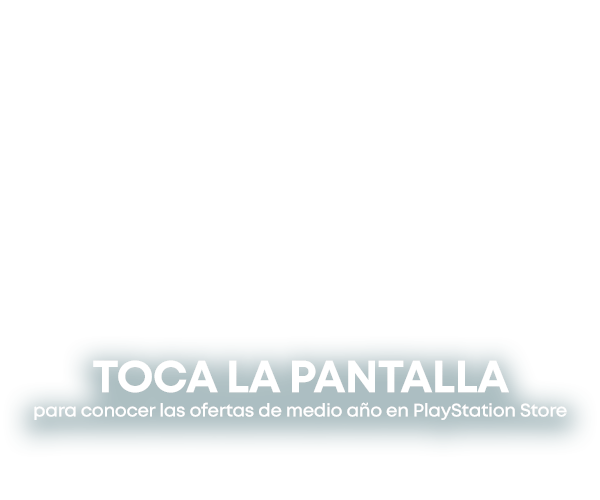

endframe.png: End Frame


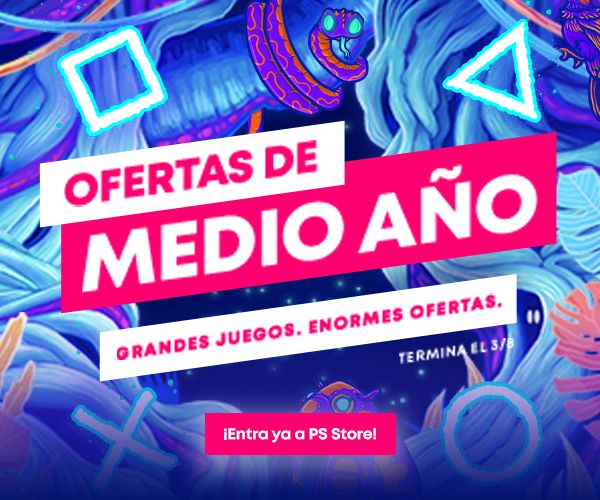

productimage-1.png: Product Image


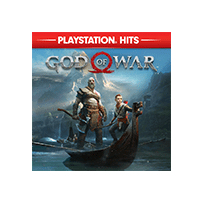

_preview.png: Interactive Elements


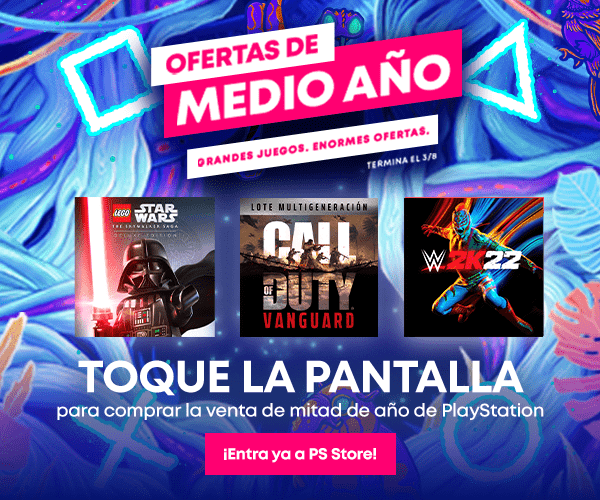

f1-bg.png: Background


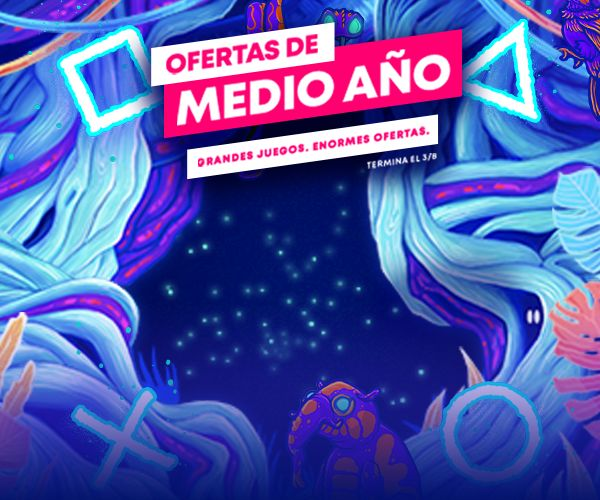

cta.png: CTA Button


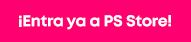

cta-rev.png: CTA Button


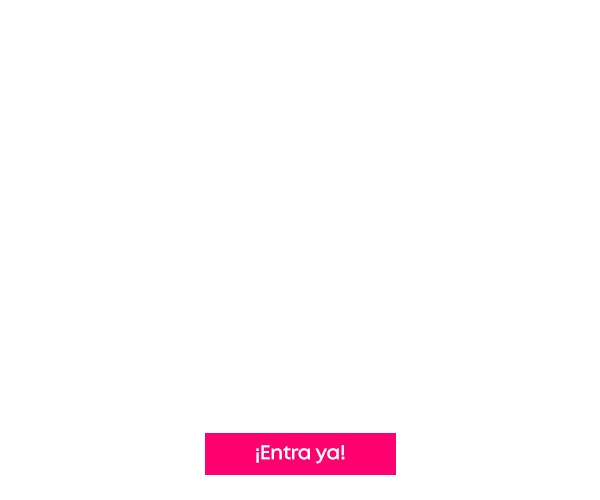

mpu-click.png: Interactive Elements


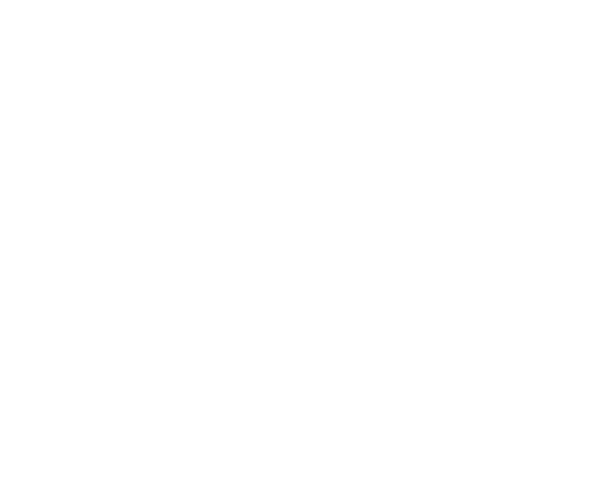

productimage-2.png: Product Image


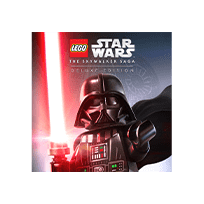

endcard-rev.png: End Frame


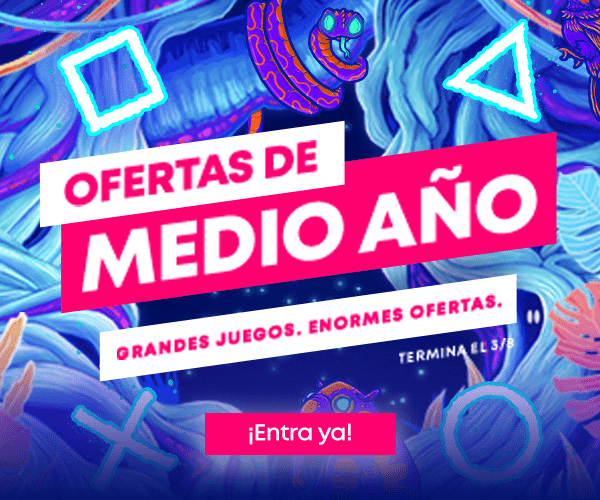

f1-instructions.png: Text Elements


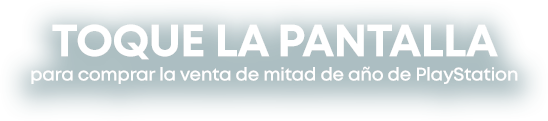

engagement_instruction.png: Text Elements


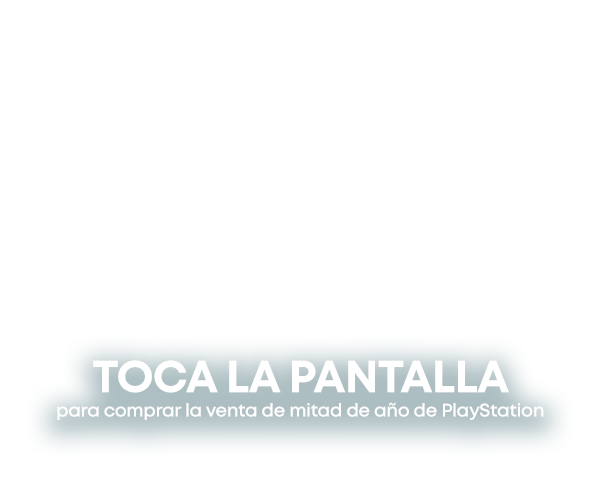

productimage-3.png: Product Image


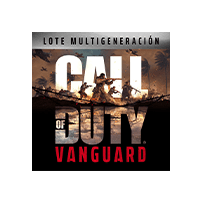

productimage-4.png: Product Image


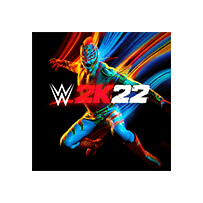

In [5]:
# Display the mapped labels
for filename, img, category in images:
    print(f"{filename}: {category}")
    img.show()

In [ ]:

# Function to resize and maintain aspect ratio
def resize_and_fit(image, target_size):
    image.thumbnail(target_size, Image.LANCZOS)
    return image

def create_ad_frame(background_image, elements, frame_size=(320, 480)):
    frame = Image.new("RGBA", frame_size, (255, 255, 255, 0))
    
    # Resize and paste the background image to fit the frame size
    bg = background_image.resize(frame_size, Image.LANCZOS)
    frame.paste(bg, (0, 0))
    
    for filename, img, category in elements:
        if category == "CTA Button":
            cta = resize_and_fit(img, (100, 50))
            frame.paste(cta, (110, 400), cta)
        elif category == "Text Elements":
            text = resize_and_fit(img, (280, 50))
            frame.paste(text, (20, 100), text)
        elif category == "Interactive Elements":
            interactive = resize_and_fit(img, (100, 100))
            frame.paste(interactive, (110, 250), interactive)
        elif category.startswith("Product Image"):
            product = resize_and_fit(img, (100, 100))
            frame.paste(product, (110, 150), product)
        elif category == "End Frame":
            end_frame = resize_and_fit(img, frame_size)
            frame.paste(end_frame, (0, 0), end_frame)
    return frame

# Find the background image
background_image = next(img for filename, img, category in images if category == "Background")

# Create ad frames with specific elements
ad_frame_1_elements = [
    ("cta-rev.png", next(img for filename, img, category in images if filename == "cta-rev.png"), "CTA Button"),
    ("f1-instructions-rev_v2-MPU.png", next(img for filename, img, category in images if filename == "f1-instructions-rev_v2-MPU.png"), "Text Elements"),
    ("mpu-click.png", next(img for filename, img, category in images if filename == "mpu-click.png"), "Interactive Elements")
]

ad_frame_2_elements = [
    ("game-1.png", next(img for filename, img, category in images if filename == "game-1.png"), "Product Image 1"),
    ("game-2.png", next(img for filename, img, category in images if filename == "game-2.png"), "Product Image 2"),
    ("game-3.png", next(img for filename, img, category in images if filename == "game-3.png"), "Product Image 3"),
    ("game-4.png", next(img for filename, img, category in images if filename == "game-4.png"), "Product Image 4")
]

ad_frame_3_elements = [
    ("_preview.png", next(img for filename, img, category in images if filename == "_preview.png"), "Interactive Elements")
]

ad_frame_4_elements = [
    ("endcard-rev.png", next(img for filename, img, category in images if filename == "endcard-rev.png"), "End Frame")
]

ad_frame_1 = create_ad_frame(background_image, ad_frame_1_elements)
ad_frame_2 = create_ad_frame(background_image, ad_frame_2_elements)
ad_frame_3 = create_ad_frame(background_image, ad_frame_3_elements)
ad_frame_4 = create_ad_frame(background_image, ad_frame_4_elements)

ad_frames = [ad_frame_1, ad_frame_2, ad_frame_3, ad_frame_4]

Catagorize and compose adframes

In [31]:
# Function to resize and maintain aspect ratio
def resize_and_fit(image, target_size):
    image.thumbnail(target_size, Image.LANCZOS)
    return image

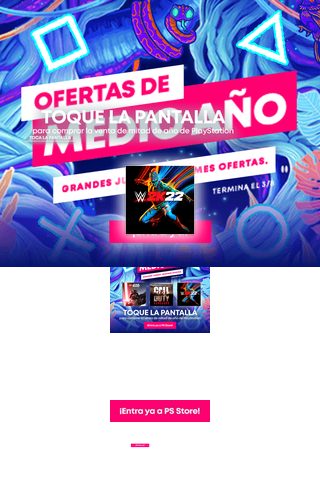

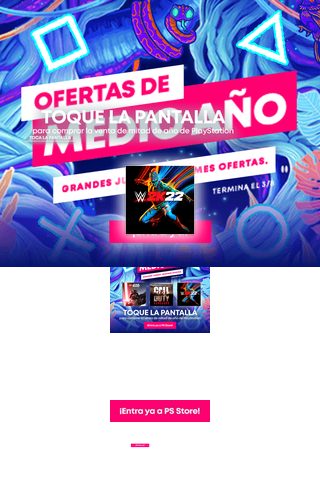

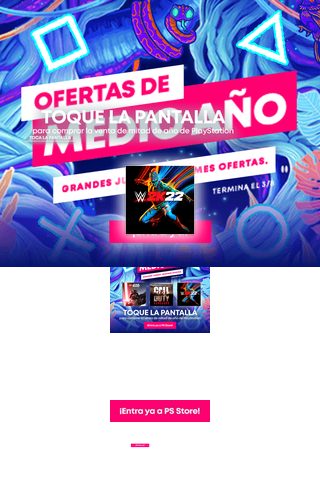

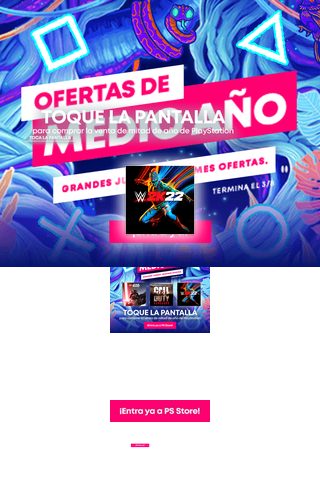

In [29]:


def create_ad_frame(images, frame_size=(320, 480)):
    frame = Image.new("RGBA", frame_size, (255, 255, 255, 0))
    
    for filename, img, category in images:
        if category == "Background":
            bg = resize_and_fit(img, frame_size)
            frame.paste(bg, (0, 0), bg)
        elif category == "Logo":
            logo = resize_and_fit(img, (80, 80))
            frame.paste(logo, (10, 10), logo)
        elif category == "CTA Button":
            cta = resize_and_fit(img, (100, 50))
            frame.paste(cta, (110, 400), cta)
        elif category == "Product Image":
            product = resize_and_fit(img, (100, 100))
            frame.paste(product, (110, 150), product)
        elif category == "Text Elements":
            text = resize_and_fit(img, (280, 50))
            frame.paste(text, (20, 100), text)
        elif category == "End Frame":
            end_frame = resize_and_fit(img, frame_size)
            frame.paste(end_frame, (0, 0), end_frame)
        elif category == "Interactive Elements":
            interactive = resize_and_fit(img, (100, 100))
            frame.paste(interactive, (110, 250), interactive)
    return frame


# Create ad frames
ad_frames = []
ad_frame_1 = create_ad_frame(images)
ad_frame_2 = create_ad_frame(images)
ad_frame_3 = create_ad_frame(images)
ad_frame_4 = create_ad_frame(images)
ad_frames.extend([ad_frame_1, ad_frame_2, ad_frame_3, ad_frame_4])

# Display ad frames
for i, frame in enumerate(ad_frames):
    frame.show(title=f"Ad Frame {i+1}")


In [32]:

def create_ad_frame(background_image, elements, frame_size=(320, 480)):
    frame = Image.new("RGBA", frame_size, (255, 255, 255, 0))
    
    # Resize and paste the background image to fit the frame size
    bg = background_image.resize(frame_size, Image.LANCZOS)
    frame.paste(bg, (0, 0))
    
    for filename, img, category in elements:
        if category == "CTA Button":
            cta = resize_and_fit(img, (100, 50))
            frame.paste(cta, (110, 400), cta)
        elif category == "Text Elements":
            text = resize_and_fit(img, (280, 50))
            frame.paste(text, (20, 100), text)
        elif category == "Interactive Elements":
            interactive = resize_and_fit(img, (100, 100))
            frame.paste(interactive, (110, 250), interactive)
        elif category == "Product Image":
            product = resize_and_fit(img, (100, 100))
            frame.paste(product, (110, 150), product)
        elif category == "End Frame":
            end_frame = resize_and_fit(img, frame_size)
            frame.paste(end_frame, (0, 0), end_frame)
    return frame

# Find the background image
background_image = next(img for filename, img, category in images if category == "Background")

# Create ad frames with specific elements
ad_frame_1_elements = [
    ("cta-rev.png", next(img for filename, img, category in images if filename == "cta-rev.png"), "CTA Button"),
    ("f1-instructions-rev_v2-MPU.png", next(img for filename, img, category in images if filename == "f1-instructions-rev_v2-MPU.png"), "Text Elements"),
    ("mpu-click.png", next(img for filename, img, category in images if filename == "mpu-click.png"), "Interactive Elements")
]

ad_frame_2_elements = [
    ("game-1.png", next(img for filename, img, category in images if filename == "game-1.png"), "Product Image"),
    ("game-2.png", next(img for filename, img, category in images if filename == "game-2.png"), "Product Image"),
    ("game-3.png", next(img for filename, img, category in images if filename == "game-3.png"), "Product Image"),
    ("game-4.png", next(img for filename, img, category in images if filename == "game-4.png"), "Product Image")
]

ad_frame_3_elements = [
    ("_preview.png", next(img for filename, img, category in images if filename == "_preview.png"), "Interactive Elements")
]

ad_frame_4_elements = [
    ("endcard-rev.png", next(img for filename, img, category in images if filename == "endcard-rev.png"), "End Frame")
]

ad_frame_1 = create_ad_frame(background_image, ad_frame_1_elements)
ad_frame_2 = create_ad_frame(background_image, ad_frame_2_elements)
ad_frame_3 = create_ad_frame(background_image, ad_frame_3_elements)
ad_frame_4 = create_ad_frame(background_image, ad_frame_4_elements)

ad_frames = [ad_frame_1, ad_frame_2, ad_frame_3, ad_frame_4]

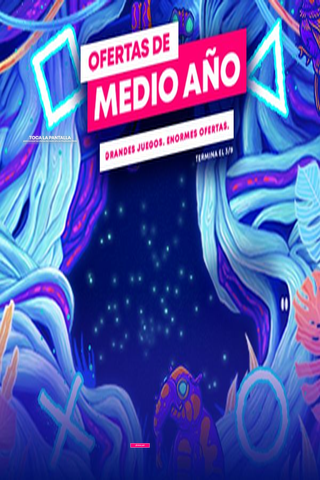

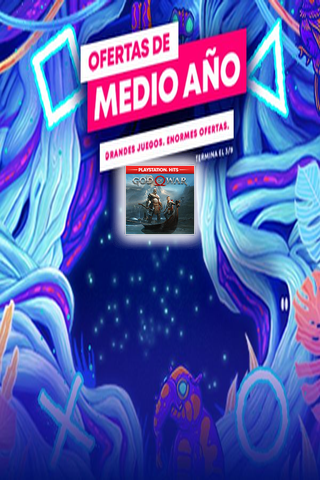

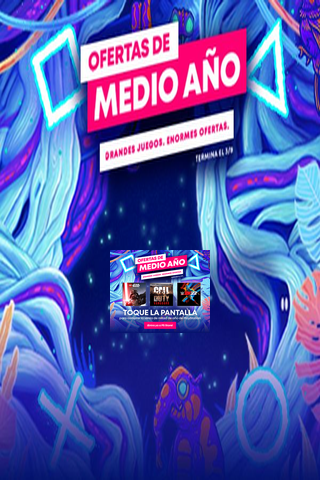

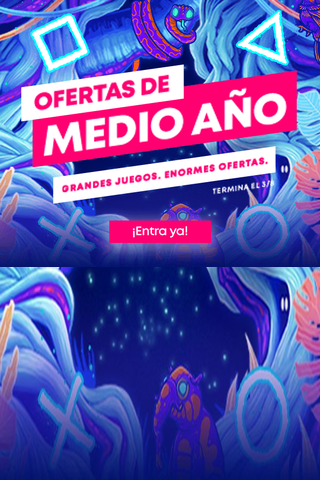

In [33]:
# Display ad frames
for i, frame in enumerate(ad_frames):
    frame.show(title=f"Ad Frame {i+1}")

### Generate a storyboard

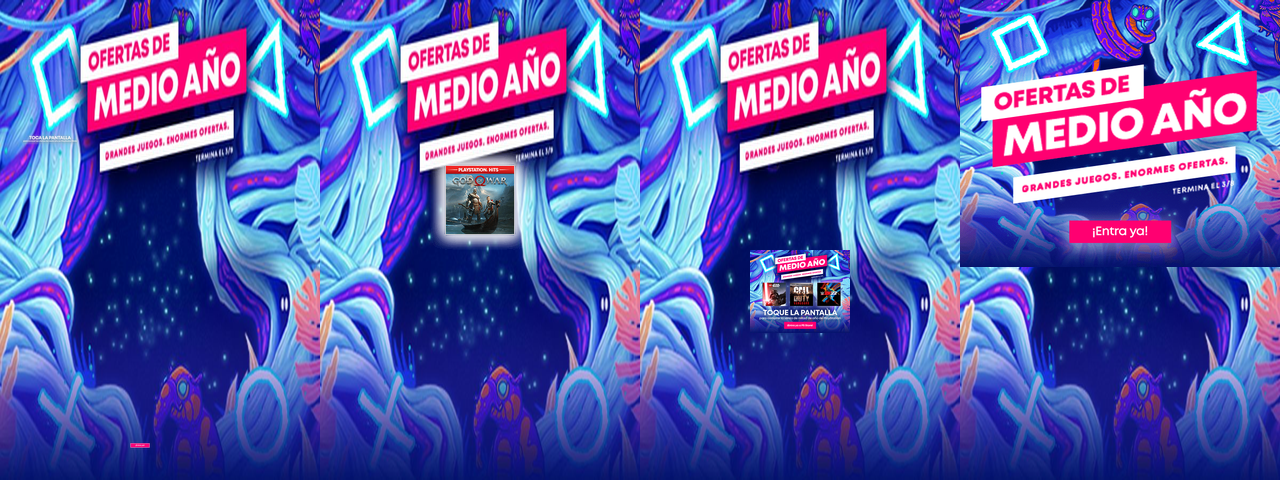

In [34]:
def create_storyboard(ad_frames, storyboard_size=(1280, 480)):
    # Create a blank storyboard
    storyboard = Image.new("RGBA", storyboard_size, (0, 0, 0, 0))
    
    for i, frame in enumerate(ad_frames):
        storyboard.paste(frame, (i * 320, 0))

    return storyboard

# Create the storyboard
storyboard = create_storyboard(ad_frames)

# Display the storyboard
storyboard.show()


In [ ]:
from typing import List

from PIL import Image

class StoryBoard:

    @staticmethod
    def combine_images_horizontally(images, separation_space=100, vertical_padding=200, background_color=(255, 255, 255)):
        """
        Combines multiple images into a new image, displayed horizontally on a larger background.
        Images are centered horizontally within the background and have vertical padding.

        :param images: loaded pillow images.
        :param separation_space: Space between images in pixels.
        :param vertical_padding: Vertical padding for the top and bottom of the images.
        :param background_color: Background color of the new image as an RGB tuple.
        :return: Combined image.
        """
        # images = [Image.open(path) for path in image_paths]
        widths, heights = zip(*(i.size for i in images))

        # Calculate total width and max height for the images, considering separation space
        total_images_width = sum(widths) + separation_space * (len(images) - 1)
        max_height = max(heights) + vertical_padding * 2

        # Calculate the background size
        background_width = total_images_width + vertical_padding * 2  # Padding on left and right for uniformity
        background_height = max_height

        # Create the background image
        background = Image.new('RGB', (background_width, background_height), color=background_color)

        # Calculate the starting x coordinate to center the images horizontally
        x_offset = (background_width - total_images_width) // 2

        # Paste each image, centered vertically
        for img in images:
            y_offset = (background_height - img.height) // 2
            background.paste(img, (x_offset, y_offset))
            x_offset += img.width + separation_space

        return background
    
if __name__ == "__main__":
    image = StoryBoard.combine_images_horizontally(['./images/01d8fa51-ca7b-499d-9938-c13f3b496439.png',
                                            'images/48e6f2e6-b292-4cae-81aa-b0362cc803f1.png',
                                            'images/d7c83396-f43f-4d61-bdf4-76db405bf2ef.png'])
    image.show()